In [1]:
pip install -r requirements.txt

In [2]:
pip install setuptools

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [4]:
bitcoindf = pd.read_csv(r"./BTC-USD.csv")
bitcoindf = bitcoindf.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})
bitcoindf.head()

,date,open,high,low,close,adj_close,volume
0,2015-09-13,235.242004,235.934998,229.332001,230.511993,230.511993,18478800.0
1,2015-09-14,230.608994,232.440002,227.960999,230.643997,230.643997,20997800.0
2,2015-09-15,230.492004,259.182007,229.822006,230.304001,230.304001,19177800.0
3,2015-09-16,230.250000,231.214996,227.401993,229.091003,229.091003,20144200.0
4,2015-09-17,229.076004,230.285004,228.925995,229.809998,229.809998,18935400.0


In [5]:
cardanodf = pd.read_csv(r".\ADA-USD.csv")
cardanodf = cardanodf.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})
cardanodf.head()

,date,open,high,low,close,adj_close,volume
0,2017-10-01,0.021678,0.032226,0.017354,0.024969,0.024969,50068700.0
1,2017-10-02,0.024607,0.030088,0.019969,0.025932,0.025932,57641300.0
2,2017-10-03,0.025757,0.027425,0.020690,0.020816,0.020816,16997800.0
3,2017-10-04,0.020864,0.022806,0.020864,0.021931,0.021931,9000050.0
4,2017-10-05,0.021951,0.022154,0.020859,0.021489,0.021489,5562510.0


In [6]:
ethereumdf = pd.read_csv(r".\ETH-USD.csv")
ethereumdf = ethereumdf.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})
ethereumdf.head()

,date,open,high,low,close,adj_close,volume
0,2015-09-13,1.041780,1.042700,0.902832,0.936003,0.936003,644138.0
1,2015-09-14,0.940566,0.949387,0.871760,0.875622,0.875622,741085.0
2,2015-09-15,0.875189,1.045540,0.875189,0.944410,0.944410,703390.0
3,2015-09-16,0.941977,0.952698,0.901639,0.907175,0.907175,615593.0
4,2015-09-17,0.906865,0.909204,0.831132,0.874231,0.874231,897940.0


In [7]:
#Convert Date column into Datatime format
bitcoindf['date'] = pd.to_datetime(bitcoindf.date, format="%Y-%m-%d")
ethereumdf['date'] = pd.to_datetime(ethereumdf.date, format="%Y-%m-%d")
cardanodf['date'] = pd.to_datetime(cardanodf.date, format="%Y-%m-%d")

Text(0.5, 1.0, 'Ethereum Close Price')

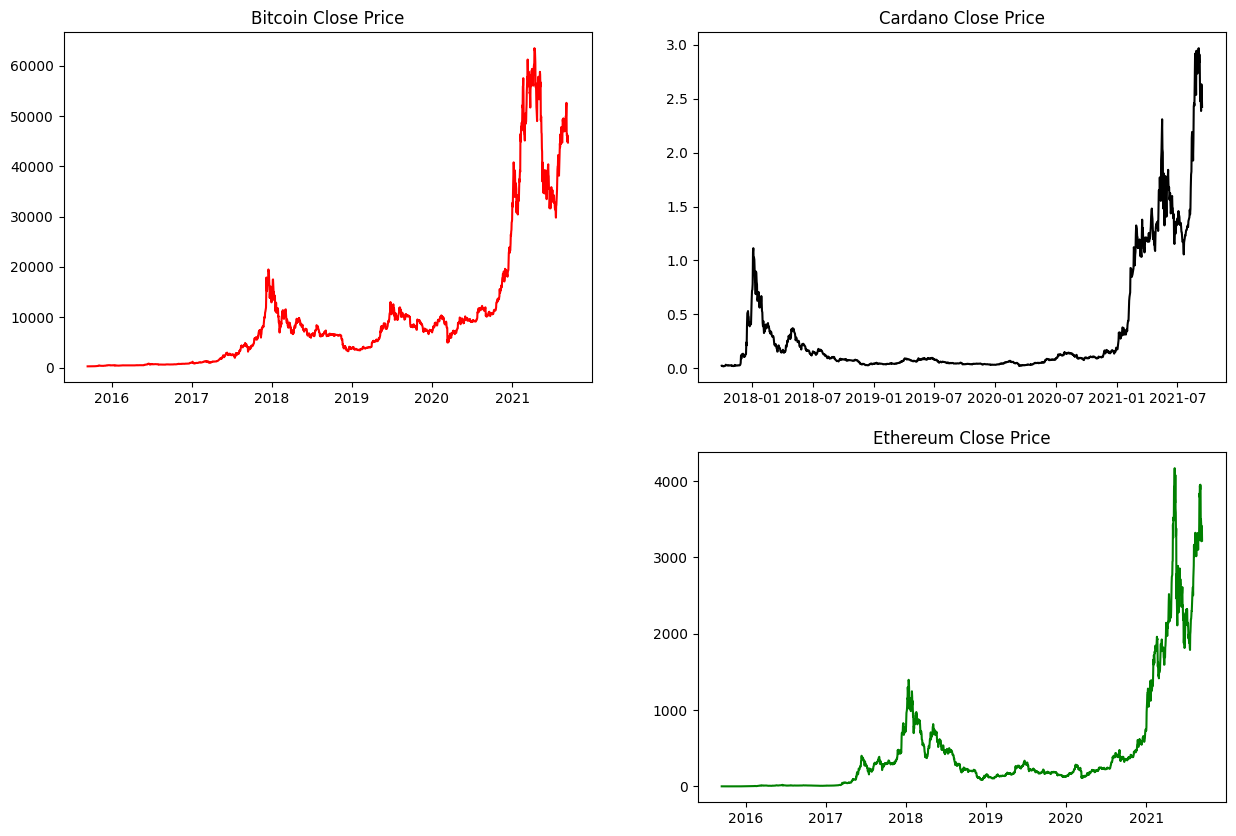

In [8]:
#Visualize close price of Bitcoin, Cardano, Ethereum
fig = plt.figure(figsize = (15,10))

plt.subplot(2, 2, 1)
plt.plot(bitcoindf['date'], bitcoindf['close'], color="red")
plt.title('Bitcoin Close Price')

plt.subplot(2, 2, 2)
plt.plot(cardanodf['date'], cardanodf['close'], color="black")
plt.title('Cardano Close Price')

plt.subplot(2, 2, 4)
plt.plot(ethereumdf['date'], ethereumdf['close'], color="green")
plt.title('Ethereum Close Price')

In [9]:
data_bitcoin=bitcoindf.sort_index(ascending=True,axis=0)
data_cardano=cardanodf.sort_index(ascending=True,axis=0)
data_ethereum=ethereumdf.sort_index(ascending=True,axis=0)


new_bitcoindf=pd.DataFrame(index=range(0,len(bitcoindf)),columns=['date','close'])
for i in range(0,len(data_bitcoin)):
    new_bitcoindf.loc[i,"date"]=data_bitcoin['date'][i]
    new_bitcoindf.loc[i, "close"]=data_bitcoin["close"][i]

new_cardanodf=pd.DataFrame(index=range(0,len(cardanodf)),columns=['date','close'])
for i in range(0,len(data_cardano)):
    new_cardanodf.loc[i,"date"]=data_cardano['date'][i]
    new_cardanodf.loc[i, "close"]=data_cardano["close"][i]

new_ethereumdf=pd.DataFrame(index=range(0,len(ethereumdf)),columns=['date','close'])
for i in range(0,len(data_ethereum)):
    new_ethereumdf.loc[i,"date"]=data_ethereum['date'][i]
    new_ethereumdf.loc[i, "close"]=data_ethereum["close"][i]

In [10]:
new_bitcoindf.head()

,date,close
0,2015-09-13 00:00:00,230.511993
1,2015-09-14 00:00:00,230.643997
2,2015-09-15 00:00:00,230.304001
3,2015-09-16 00:00:00,229.091003
4,2015-09-17 00:00:00,229.809998


In [11]:
# Config index dataset to column "date"
# DataFrameName.set_index(“column_name_to_setas_Index”,inplace=True/False)
new_bitcoindf.set_index("date", inplace=True)
new_cardanodf.set_index("date", inplace=True)
new_ethereumdf.set_index("date", inplace=True)


d:\download_setup\python\Python\Python312\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


In [12]:
new_bitcoindf.head()

,close
date,
2015-09-13,230.511993
2015-09-14,230.643997
2015-09-15,230.304001
2015-09-16,229.091003
2015-09-17,229.809998


In [13]:
# import model
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

print(new_bitcoindf.shape)
print(new_cardanodf.shape)
print(new_ethereumdf.shape)


(2193, 1)
(1444, 1)
(2193, 1)


In [14]:
final_bitcoindf=new_bitcoindf.values
final_cardanodf=new_cardanodf.values
final_ethereumdf=new_ethereumdf.values

In [15]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_bitcoindf)

In [ ]:
# Build and train the LSTM model


In [97]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR #support vector regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer


In [113]:
imputer = SimpleImputer(strategy='mean')  # You can use 'median', 'most_frequent', or 'constant' as strategies
bitcoindf['open'] = imputer.fit_transform(bitcoindf[['open']])
bitcoindf['high'] = imputer.fit_transform(bitcoindf[['high']])
bitcoindf['low'] = imputer.fit_transform(bitcoindf[['low']])
bitcoindf['adj_close'] = imputer.fit_transform(bitcoindf[['adj_close']])
bitcoindf['volume'] = imputer.fit_transform(bitcoindf[['volume']])
bitcoindf['close'] = imputer.fit_transform(bitcoindf[['close']])

In [114]:
# Split the data into training and testing sets
X = bitcoindf[['open', 'high', 'low', 'adj_close', 'volume']]
y = bitcoindf['close']

In [115]:
X.isnull().sum()

open         0
high         0
low          0
adj_close    0
volume       0
dtype: int64

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
y_train.head

<bound method NDFrame.head of 1477     8104.185547
162       437.747986
1822    10131.516602
1544     7448.307617
561      1045.770020
            ...     
1638     8108.116211
1095     6351.799805
1130     6544.430176
1294     4106.660156
860     12899.200195
Name: close, Length: 1754, dtype: float64>

In [118]:
# check for NaN values
print(X_train.isnull().sum())

open         0
high         0
low          0
adj_close    0
volume       0
dtype: int64


In [119]:
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (1754, 5)
y_train:  (1754,)
X_test:  (439, 5)
y_test (439,)


In [120]:
print(X_train.isnull().sum())

open         0
high         0
low          0
adj_close    0
volume       0
dtype: int64


In [121]:
scaler = StandardScaler() # Scale the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [122]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [123]:
predictions = lr_model.predict(X_test)
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_test, predictions)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_test, predictions))))

Mean Absolute Error - MAE : 3.935921191599046e-12
Root Mean squared Error - RMSE : 6.224110617447761e-12


In [124]:
#gui


In [125]:
import tkinter as tk
from tkinter import messagebox

In [126]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [127]:
# GUI code
root = tk.Tk()
root.geometry('400x200')
root.title("Cryptocurrency Price Prediction")

''

In [128]:
# Create input labels and entry fields
open_label = tk.Label(root, text="Open:")
open_label.grid(row=0, column=0)
open_entry = tk.Entry(root)
open_entry.grid(row=0, column=1)

high_label = tk.Label(root, text="High:")
high_label.grid(row=1, column=0)
high_entry = tk.Entry(root)
high_entry.grid(row=1, column=1)

low_label = tk.Label(root, text="Low:")
low_label.grid(row=2, column=0)
low_entry = tk.Entry(root)
low_entry.grid(row=2, column=1)

adj_close_label = tk.Label(root, text="Adj Close:")
adj_close_label.grid(row=4, column=0)
adj_close_entry = tk.Entry(root)
adj_close_entry.grid(row=4, column=1)

volume_label = tk.Label(root, text="Volume:")
volume_label.grid(row=5, column=0)
volume_entry = tk.Entry(root)
volume_entry.grid(row=5, column=1)

# Create prediction label
prediction_label = tk.Label(root, text="")
prediction_label.grid(row=6, column=0, columnspan=2)


In [129]:
# Create predict button

def predict():
    # Get user input
    open_val = float(open_entry.get())
    high_val = float(high_entry.get())
    low_val = float(low_entry.get())
   # close_val = float(close_entry.get())
    adj_close_val = float(adj_close_entry.get())
    volume_val = float(volume_entry.get())
     # Make prediction using linear regression model
    input_data = [[open_val, high_val, low_val, adj_close_val, volume_val]]
    prediction = lr_model.predict(input_data)[0]
     # Update prediction label
    prediction_label.config(text="Predicted price: ${:.2f}".format(prediction))

In [130]:
predict_btn = tk.Button(root, text="Predict", command=predict)
predict_btn.grid(row=6, column=0)


In [131]:
# Create clear button
def clear():
    # Clear input fields and prediction label
    open_entry.delete(0, tk.END)
    high_entry.delete(0, tk.END)
    low_entry.delete(0, tk.END)
    #close_entry.delete(0, tk.END)
    adj_close_entry.delete(0, tk.END)
    volume_entry.delete(0, tk.END)
    prediction_label.config(text="")

In [132]:
clear_btn = tk.Button

In [133]:
# Start the GUI event loop
root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "d:\download_setup\python\Python\Python312\Lib\tkinter\__init__.py", line 1967, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_3552\3242612241.py", line 5, in predict
    open_val = float(open_entry.get())
               ^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: ''
